# Probability Distributions

**Mathematical Foundations for Machine Learning**

---

## Recommended Video Lectures

These videos will help you build intuition for the concepts we'll cover:

### StatQuest with Josh Starmer
Josh Starmer's explanations are clear and popular for a reason.
- [Probability Explained](https://www.youtube.com/watch?v=oI3hZJqXJuc) - Start here for fundamentals
- [Normal Distribution Explained](https://www.youtube.com/watch?v=rzFX5NJrwDo) - The most important distribution in statistics
- [Binomial Distribution](https://www.youtube.com/watch?v=J8NR4j6bwHc) - Discrete probability made simple

### Steve Brunton - Engineering Math
If you want more rigorous mathematical grounding:
- [Probability and Statistics](https://www.youtube.com/watch?v=haQ2ijUMh0w) - More advanced material
- [Bayes Theorem](https://www.youtube.com/watch?v=XQoLVl31ZfQ) - Conditional probability
- [Expected Value and Variance](https://www.youtube.com/watch?v=3pQwMzJJFJQ) - Key concepts

### 3Blue1Brown - Probability & Statistics
Visual intuition and excellent animations:
- [Binomial Distribution](https://www.youtube.com/watch?v=8idr1WZ1A7Q) - See it in action

In [15]:
# Video lectures are in the markdown cell above
# Watch them before continuing with the code examples

---
## Introduction

### What is a Probability Distribution?
A probability distribution describes the likelihood of different outcomes for a random variable. It's a mathematical way of saying "what values are likely to occur, and how often?"

Why should you care? In machine learning, distributions matter because:
- **Data Analysis**: Most real data follows some distribution (usually close to normal)
- **Model Building**: Many algorithms assume errors are normally distributed
- **Generative Models**: GANs and VAEs learn to generate new data from distributions

### Key Concepts

| Term | Symbol | Meaning |
| :--- | :---: | :--- |
| Random Variable | $X$ | A variable that can take different values by chance |
| PMF | $P(X=x)$ | For discrete values, the probability of getting exactly that value |
| PDF | $f(x)$ | For continuous values, the likelihood density near that value |
| CDF | $F(x)$ | The probability of getting a value less than or equal to $x$ |

Note: For continuous distributions, the probability at any single point is zero. We talk about the probability of getting values in a range: $P(a \le X \le b) = \int_a^b f(x) dx$.



### Setup and Imports


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

# Elite Visual Style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("talk")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

%matplotlib inline


### Bernoulli Distribution
The simplest discrete distribution. It models a single yes/no experiment:
- Success (outcome = 1) with probability $p$
- Failure (outcome = 0) with probability $1-p$

Formula:
$$P(X=k) = p^k (1-p)^{1-k} \quad \text{for } k \in \{0, 1\}$$

Key statistics:
- Mean: $E[X] = p$
- Variance: $\text{Var}(X) = p(1-p)$


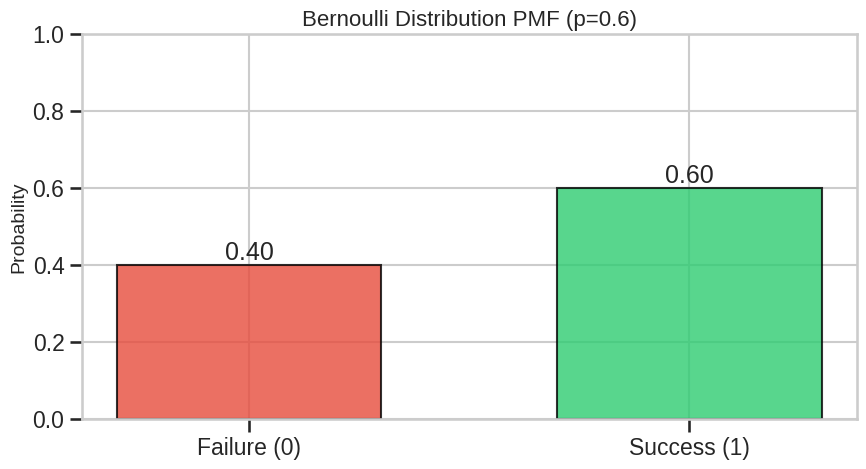

In [17]:
# Bernoulli Parameters
p = 0.6  # Probability of success (e.g., loaded coin)

# Generate variates
bernoulli_dist = stats.bernoulli(p)
x = [0, 1]
pmf = [bernoulli_dist.pmf(k) for k in x]

# Visualization
plt.figure(figsize=(10, 5))
bars = plt.bar(x, pmf, color=['#e74c3c', '#2ecc71'], alpha=0.8, edgecolor='black', width=0.6)
plt.xticks(x, ['Failure (0)', 'Success (1)'])
plt.ylabel('Probability')
plt.title(f'Bernoulli Distribution PMF (p={p})')
plt.ylim(0, 1)

# Annotate
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom')
plt.show()


### Binomial Distribution
When you repeat the same yes/no experiment multiple times, you get a binomial distribution. It counts how many successes you get in $n$ trials.

Formula:
$$P(X=k) = \binom{n}{k} p^k (1-p)^{n-k}$$

Parameters:
- $n$: Total number of trials
- $p$: Probability of success on each trial

Key statistics:
- Mean: $E[X] = np$
- Variance: $\text{Var}(X) = np(1-p)$

Example: If you flip a fair coin 10 times, what's the probability of getting exactly 7 heads? That's a binomial problem with $n=10$ and $p=0.5$.


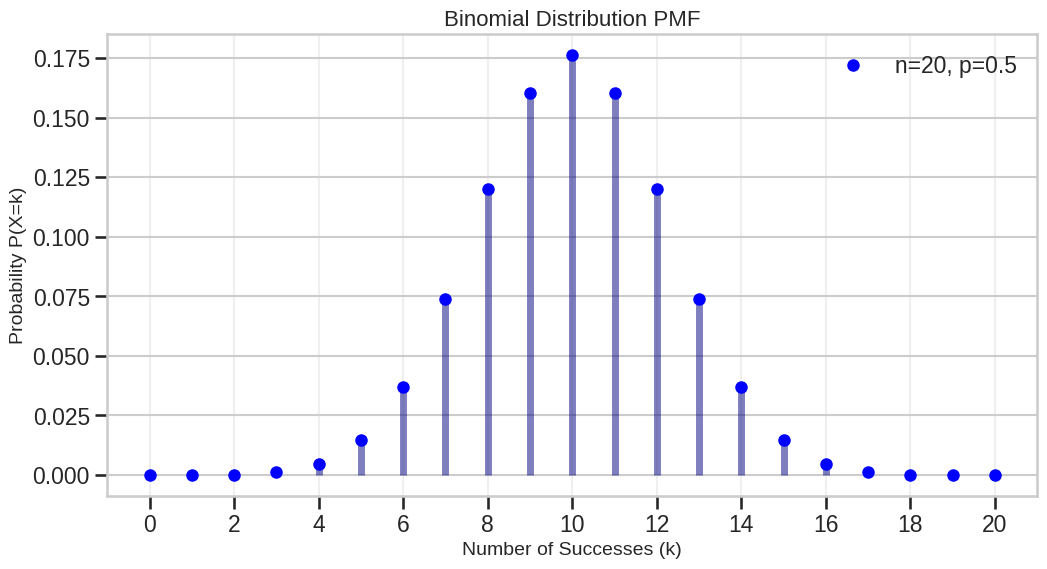

In [18]:
# Binomial Parameters
n_trials = 20
p_success = 0.5  # Fair coin

# X-axis: Number of successes (0 to n)
k_values = np.arange(0, n_trials + 1)
binom_pmf = stats.binom.pmf(k_values, n_trials, p_success)

# Visualization
plt.figure(figsize=(12, 6))
plt.vlines(k_values, 0, binom_pmf, colors='navy', lw=5, alpha=0.5)
plt.plot(k_values, binom_pmf, 'bo', ms=8, label=f'n={n_trials}, p={p_success}')
plt.title('Binomial Distribution PMF')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability P(X=k)')
plt.xticks(np.arange(0, n_trials+1, 2))
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.show()


#### Experiment: How do n and p affect the shape?
Let's visualize what happens when we change the parameters:



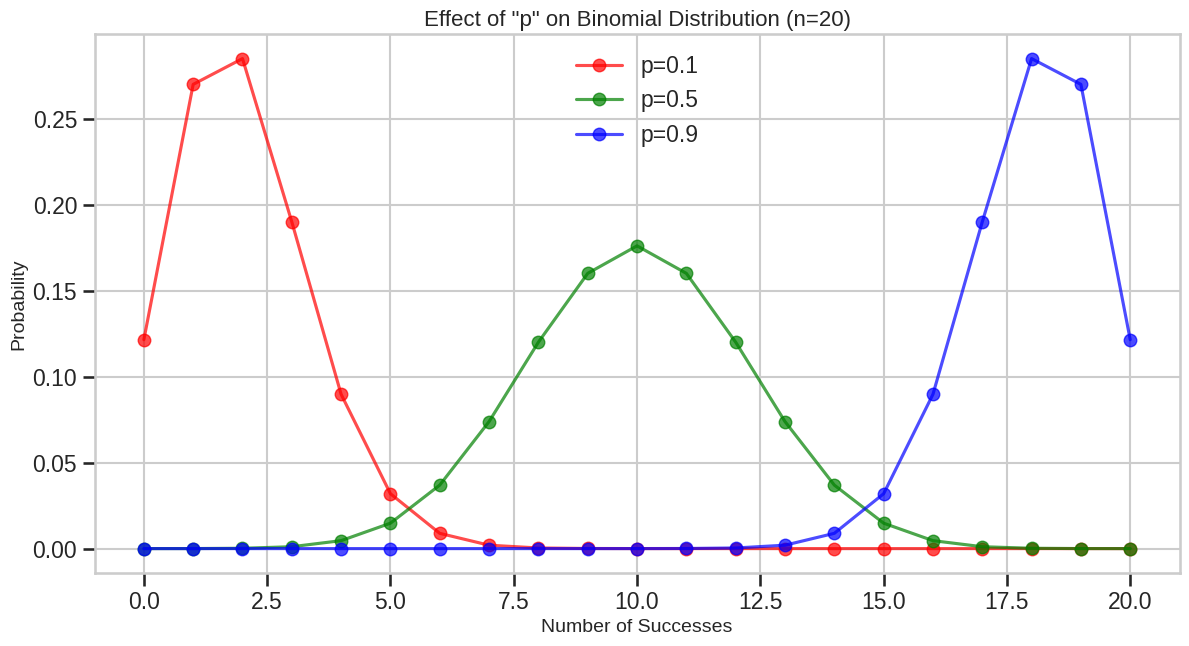

In [19]:
plt.figure(figsize=(14, 7))
n = 20
for p_val, color in zip([0.1, 0.5, 0.9], ['red', 'green', 'blue']):
    pmf = stats.binom.pmf(k_values, n, p_val)
    plt.plot(k_values, pmf, '-o', label=f'p={p_val}', color=color, alpha=0.7)

plt.title(f'Effect of "p" on Binomial Distribution (n={n})')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.legend()
plt.show()


### Poisson Distribution
Use this when you're counting events that happen at a constant rate over time or space. Examples: emails per hour, customer arrivals per day, typos per page.

Formula:
$$P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!}$$

Parameter:
- $\lambda$ (lambda): The average number of events per interval

Key statistics:
- Mean: $E[X] = \lambda$
- Variance: $\text{Var}(X) = \lambda$ (mean equals variance!)

Interesting fact: When you have a binomial distribution with very large $n$ and very small $p$, it approximates a Poisson distribution.


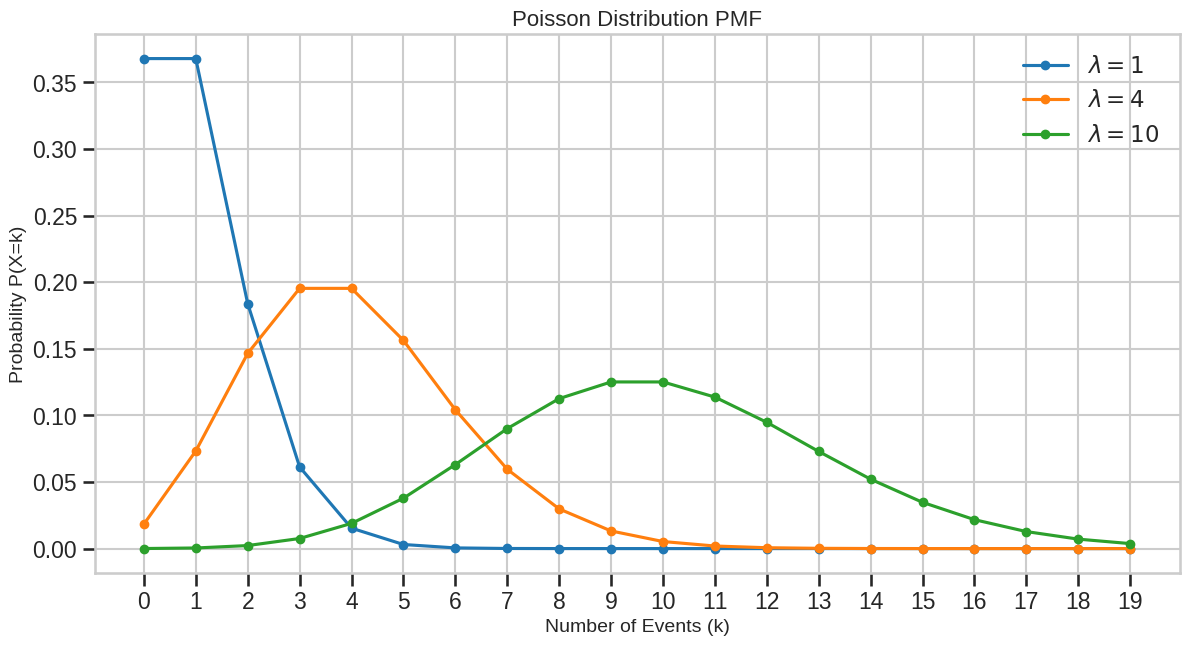

In [20]:
# Poisson Parameters
lambdas = [1, 4, 10]
k_axis = np.arange(0, 20)

plt.figure(figsize=(14, 7))

for l in lambdas:
    pmf = stats.poisson.pmf(k_axis, l)
    plt.plot(k_axis, pmf, '-o', ms=6, label=rf'$\lambda={l}$')

plt.title('Poisson Distribution PMF')
plt.xlabel('Number of Events (k)')
plt.ylabel('Probability P(X=k)')
plt.legend()
plt.xticks(k_axis)
plt.show()


### Uniform Distribution
The simplest continuous distribution: every value between $a$ and $b$ is equally likely. If you know nothing about the data except its range, this is your default choice.

Formula:
$$f(x) = \frac{1}{b-a} \quad \text{for } a \le x \le b$$

Parameters:
- $a$: Lower bound
- $b$: Upper bound

Key statistics:
- Mean: $E[X] = \frac{a+b}{2}$ (the midpoint)
- Variance: $\text{Var}(X) = \frac{(b-a)^2}{12}$


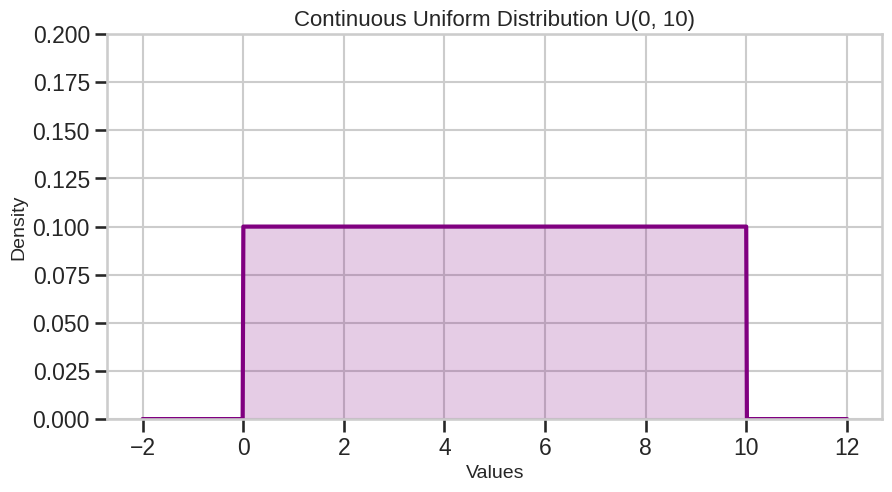

In [21]:
# Uniform Parameters
a, b = 0, 10
x = np.linspace(a-2, b+2, 1000)
pdf = stats.uniform.pdf(x, loc=a, scale=b-a)

plt.figure(figsize=(10, 5))
plt.plot(x, pdf, lw=3, color='purple')
plt.fill_between(x, pdf, color='purple', alpha=0.2)
plt.title(f'Continuous Uniform Distribution U({a}, {b})')
plt.ylabel('Density')
plt.xlabel('Values')
plt.ylim(0, 0.2)
plt.show()


### Normal (Gaussian) Distribution
Probably the most important distribution in statistics. It shows up everywhere in nature and data. The bell curve is so common because of the Central Limit Theorem: when you add up many independent random variables, you get a normal distribution.

Formula:
$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right)$$

Parameters:
- $\mu$ (mu): The center/mean
- $\sigma$ (sigma): How wide/spread out the distribution is (standard deviation)

Key statistics:
- Mean: $E[X] = \mu$
- Variance: $\text{Var}(X) = \sigma^2$
- Special case: Standard Normal $N(0,1)$ has mean 0 and std dev 1


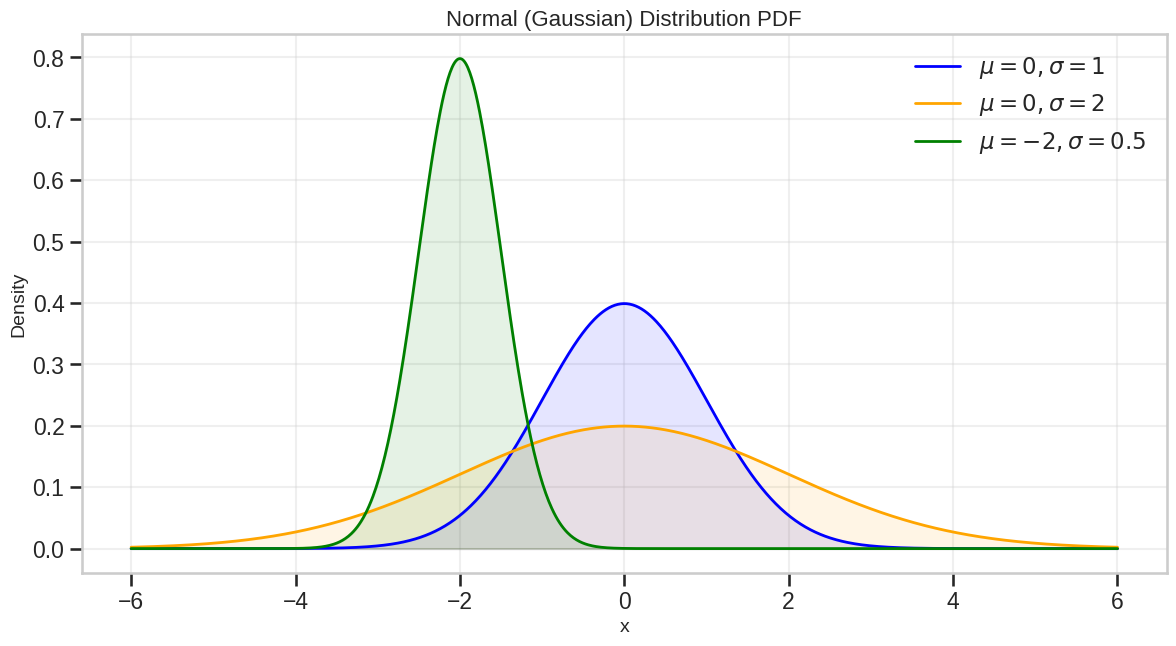

In [22]:
# Normal Parameters
mu_values = [0, 0, -2]
sigma_values = [1, 2, 0.5]
colors = ['blue', 'orange', 'green']

x = np.linspace(-6, 6, 1000)

plt.figure(figsize=(14, 7))

for mu, sigma, c in zip(mu_values, sigma_values, colors):
    pdf = stats.norm.pdf(x, loc=mu, scale=sigma)
    plt.plot(x, pdf, label=rf'$\mu={mu}, \sigma={sigma}$', color=c, lw=2)
    plt.fill_between(x, pdf, color=c, alpha=0.1)

plt.title('Normal (Gaussian) Distribution PDF')
plt.ylabel('Density')
plt.xlabel('x')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


#### The 68-95-99.7 Rule
For a normal distribution:
- 68% of data falls within $\mu \pm 1\sigma$
- 95% of data falls within $\mu \pm 2\sigma$
- 99.7% of data falls within $\mu \pm 3\sigma$



---
## Advanced Concepts

### Central Limit Theorem (CLT) Demo
Here's one of the most powerful concepts in statistics: No matter what distribution your data comes from, if you take many samples and look at the average of each sample, those averages will form a normal distribution.

Let's see this in action by taking samples from a uniform distribution (which looks nothing like a bell curve) and plotting the means.



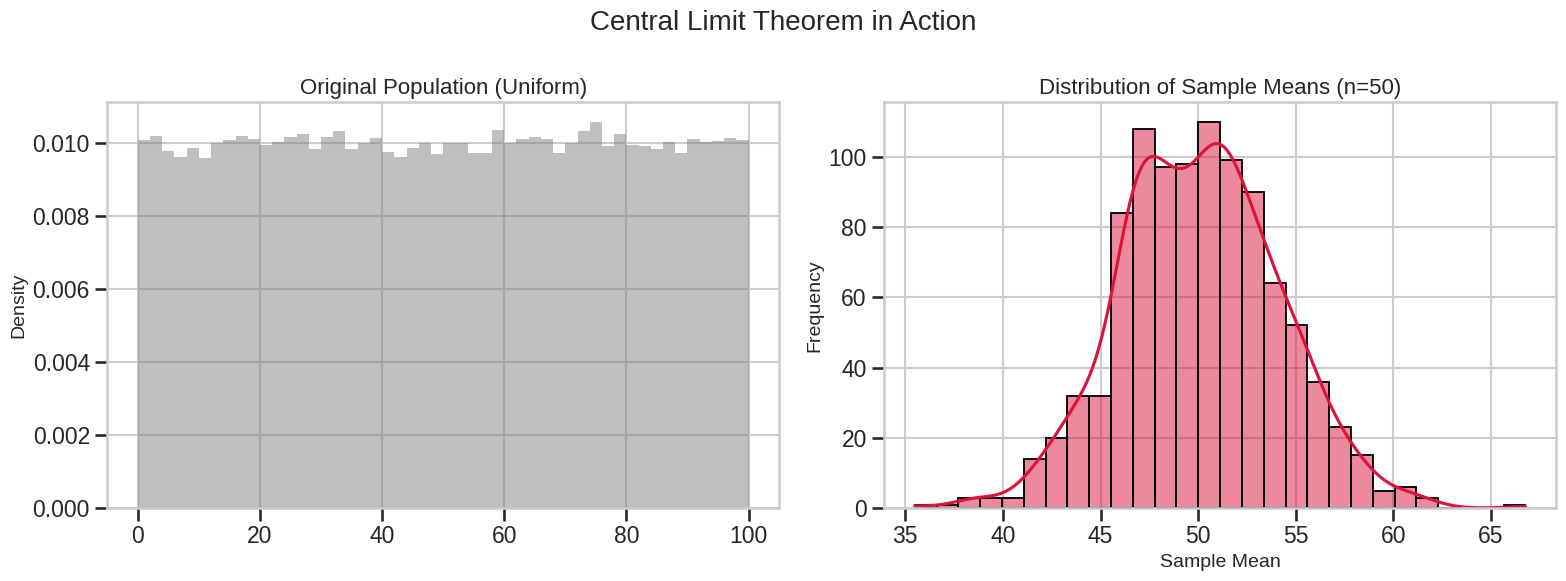

In [23]:
# Parameters
pop_size = 100000
sample_size = 50   # n
num_samples = 1000 # Number of times we calculate the mean

# 1. Create a non-normal population (Uniform)
population = np.random.uniform(0, 100, pop_size)

# 2. Draw samples and calculate means
sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(population, sample_size)
    sample_means.append(np.mean(sample))

# Visualization
plt.figure(figsize=(16, 6))

# Plot Population
plt.subplot(1, 2, 1)
plt.hist(population, bins=50, color='gray', alpha=0.5, density=True)
plt.title('Original Population (Uniform)')
plt.ylabel('Density')

# Plot Sample Means
plt.subplot(1, 2, 2)
sns.histplot(sample_means, kde=True, color='crimson')
plt.title(f'Distribution of Sample Means (n={sample_size})')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')

plt.suptitle('Central Limit Theorem in Action', fontsize=20)
plt.tight_layout()
plt.show()


---
## Exercises

Tip: Use `scipy.stats` to do the calculations.

### Exercise 1: Quality Control
A factory produces light bulbs where 2% are defective. You randomly sample 50 bulbs.
1. What distribution models this scenario?
2. What is the probability that exactly 3 are defective?
3. What is the probability that at least 1 is defective?



In [24]:
# Write your code here
# Hint: n=50, p=0.02. Use Binomial.



### Exercise 2: Website Traffic
Your website gets an average of 10 hits per minute.
1. What is the probability of getting exactly 15 hits in a minute?
2. What is the probability of getting fewer than 5 hits?



In [25]:
# Write your code here
# Hint: lambda=10. Use Poisson.



---
## Summary

Quick recap of what we covered:
- **Discrete vs Continuous**: Some things you count (PMF), others you measure continuously (PDF)
- **Bernoulli/Binomial**: Yes/no questions and repeated trials
- **Poisson**: Events happening at a constant rate
- **Normal**: The famous bell curve that shows up everywhere (thanks to the Central Limit Theorem)
- **CLT**: The reason normal distributions are so powerful for statistics

## Further Reading
If you want to go deeper:
- [Bishop, C. M. "Pattern Recognition and Machine Learning" (Chapter 2)](https://www.microsoft.com/en-us/research/people/cmbishop/prml-book/)
- [Khan Academy: Statistics and Probability](https://www.khanacademy.org/math/statistics-probability)

